# __Basic Python-based Linear Regression using Boston Housing dataset__

Let's start by importing the relevant libraries

In [159]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline 

Now let's import the Boston dataset from the sklearn library

In [160]:
from sklearn.datasets import load_boston

In [161]:
boston = load_boston()

In [162]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [163]:
print (bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Note that attribute column number 14 MEDV is the PRICE TARGET

In [164]:
# The keys method shows the dataset keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [165]:
# Let's figure out the dataset shape..
boston.data.shape

(506, 13)

In [166]:
# ..as well as its features
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

Time to convert into Pandas to make it easy to manipulate

In [167]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [168]:
# And add the column names
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


We also need to add a column for the results of the regression , ie the PRICE TARGET

In [169]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


Now we need to drop momentarily the column PRICE to ensure our X attributes do not contain the Y results

In [170]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

Time for the classic train/test splitting:

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Finally we can kick off the actual Linear Regression, let's use scikit's LM

In [172]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now lets make predictions

In [179]:
Y_pred = lm.predict(X_test)

First we would like to learn what is the Mean Square Error

In [184]:
print(sklearn.metrics.mean_squared_error(Y_test, Y_pred))

28.5413672756


Now we can print predictions!

In [222]:
print(Y_pred)

[ 37.46723562  31.39154701  27.1201962    6.46843347  33.62966737
   5.67067989  27.03946671  29.92704748  26.35661334  22.45246021
  32.20504441  21.78641653  23.41138441  33.60894362  28.28619511
  15.13859055   0.30087325  18.71850376  14.4706712   11.10823598
   2.69494197  19.21693734  38.41159345  24.36936442  31.61493439
  11.42210397  24.92862188  23.31178043  22.7764079   20.65081211
  16.035198     7.07978633  17.65509209  22.81470561  29.21943405
  18.61354566  28.37701843   8.80516873  41.65140459  34.02910176
  20.1868926    3.95600857  29.69124564  12.18081256  27.19403498
  30.63699231  -6.24952457  19.9462404   21.55123979  13.36478173
  20.39068171  19.87353324  23.57656877  13.40141285  17.66457201
  24.77424747  35.31476509  15.48318159  28.50764575  21.72575404
  20.58142839  26.08460856  14.51816968  32.37494056  20.80917392
  12.18932524  19.45551285  25.23390429  21.77302317  21.30227044
  20.58222113  26.74635016  17.53006166  18.7191946   19.03026793
  25.76553

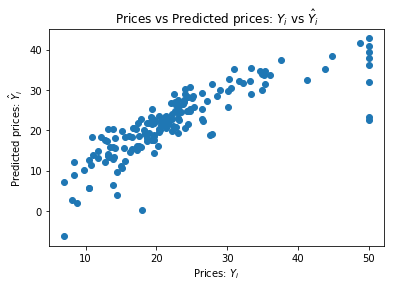

In [180]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Since the model does not fit 100% (the MSE is positive), the scatter plot does not create a completely linear line. But the model is a starting point for simple predictions.

The coef_ method will give us the equation coefficients:

In [191]:
lm.coef_

array([ -1.56381297e-01,   3.85490972e-02,  -2.50629921e-02,
         7.86439684e-01,  -1.29469121e+01,   4.00268857e+00,
        -1.16023395e-02,  -1.36828811e+00,   3.41756915e-01,
        -1.35148823e-02,  -9.88866034e-01,   1.20588215e-02,
        -4.72644280e-01])

and intercept_ will provide the axis intercept:

In [192]:
lm.intercept_

32.858932634086806

Another cool thing we can do is fetch overall stats about the regression, we can use statsmodels to do it 

In [237]:
import statsmodels.api as sm
X = bos["RM"]
y = bos["PRICE"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() # yeah, sm.OLS take paramteres in inverted order :)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           2.49e-74
Time:                        19:20:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A few things to notice - since we are using only one variable for estimates it is expected R2 (% of variance that the model explains) to be somewhat low. 
Coefficient of 9.10 means that as the RM variable increases by 1, the predicted value of MDEV increases by 9.10.
Note also standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of RM is between 8.2 to 9.10).